### Імпорт бібліотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from utils import *

%matplotlib inline

### Завантажити набір даних

In [2]:
sample_submission = pd.read_csv('dataset/house-prices/sample_submission.csv') # приклад результату для перевірки
ds_train = pd.read_csv('dataset/house-prices/train.csv')                      # набір даних для тренування моделі
ds_test = pd.read_csv('dataset/house-prices/test.csv')                        # набір даних для тестування моделі
print(f"Розмірність набору даних для тренування моделі: {ds_train.shape}")
print(f"Розмірність набору даних для тестування моделі: {ds_test.shape}")
ds_train.head()

Розмірність набору даних для тренування моделі: (1460, 81)
Розмірність набору даних для тестування моделі: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Як видно, набір даних для тренування містить 1460 спостережень, кожне з яких має 81 ознаку. При цьому ці 81 одна ознака складаються з: 
* "Id" - ідентифікатор кожного спостереження;
* 79 ознак, які характеризують кожне спостереження. Саме ці характеризуючі ознаки ми і будемо аналізувати та використовувати для тренування моделі;
* "SalePrice" - цільова ознака, а саме - вартість будинку. В тестовому наборі даних ця 81-а ознака відсутня. Саме цю ознаку нам і треба буде знайти нашою моделлю для тестового набору даних. 

In [3]:
# draw_hist_normal_prob_plot(ds_train, ['SalePrice', 'GrLivArea'])

In [4]:
# total = ds_train.isnull().sum().sort_values(ascending=False)
# percent = (ds_train.isnull().sum()/ds_train.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(20)
# missing_data[total>0]

In [5]:
# ds_train = pd.read_csv('dataset/house-prices/train.csv')

# cols = ['SalePrice', 'GarageCars', 'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual']
# ds_train[cols]=ds_train[cols].fillna('na')

# ds_train = encode_labels(ds_train, cols)
# for i in cols:
#     ds_train.loc[ds_train[ds_train[i].isnull()==True].index,i]=ds_train[i].value_counts().keys()[0]

# draw_scatter_plots(ds_train, cols)

In [6]:
# cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
# draw_correlation_matrix(ds_train[cols])

In [7]:
# var = 'GrLivArea'
# data = pd.concat([ds_train['SalePrice'], ds_train[var]], axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [8]:
# indxs = ds_train.sort_values(by = 'GrLivArea', ascending = False)[:2].index
# ds_train = ds_train.drop(indxs)

In [9]:
# data = pd.concat([ds_train['SalePrice'], ds_train[var]], axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [10]:
# ds_train = pd.get_dummies(ds_train)
# ds_train.head()

### Перевірка, очищення, покращення та створення нових ознак

Як ми вже зазначили вище, ми маємо ознаку, яка не впливає на прогностичні здібності моделі - 'Id'. 
Видалемо цю ознаку.

In [11]:
# Видалемо колонку 'Id', оскільки вона не впливає на тренування та прогноз вартості
test_ids = ds_test.Id
dsc_train = drop_features(ds_train, ["Id"])
dsc_test = drop_features(ds_test, ["Id"])
print(f"Розмірність набору даних для тренування після видалення 'Id' та 'SalePrice': {dsc_train.shape}")
print(f"Розмірність набору даних для тестування після видалення 'Id': {dsc_test.shape}")

Розмірність набору даних для тренування після видалення 'Id' та 'SalePrice': (1460, 80)
Розмірність набору даних для тестування після видалення 'Id': (1459, 79)


### Проведемо первинний огляд "SalePrice"

In [12]:
dsc_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

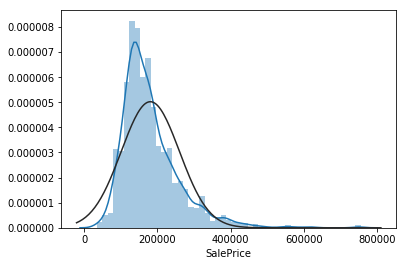

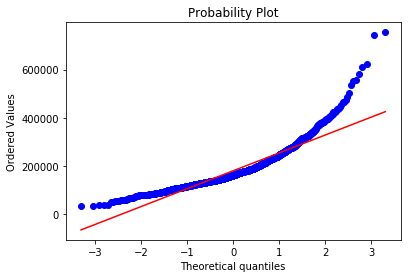

In [13]:
draw_hist_normal_prob_plot(dsc_train["SalePrice"], None)

Очевидно, що вартість має відхилення від нормального розподілу та позитивну асиметрію. Разом з тим відсутні нульові значення. Cхоже що "SalePrice" цілком придатна для тренування деяких моделей. Для лінійної моделі потрібно буде виконати нормалізацію.

### Log-трансформація цільової змінної

In [14]:
# dsc_train["SalePrice"] = np.log(dsc_train["SalePrice"])
# draw_hist_normal_prob_plot(dsc_train["SalePrice"], None)

Ок, тепер значення виглядають більш нормально розподіленими.

### Пропущені ознаки

Поглянемо, чи є в нас пропущені дані в тренувальному наборі даних.

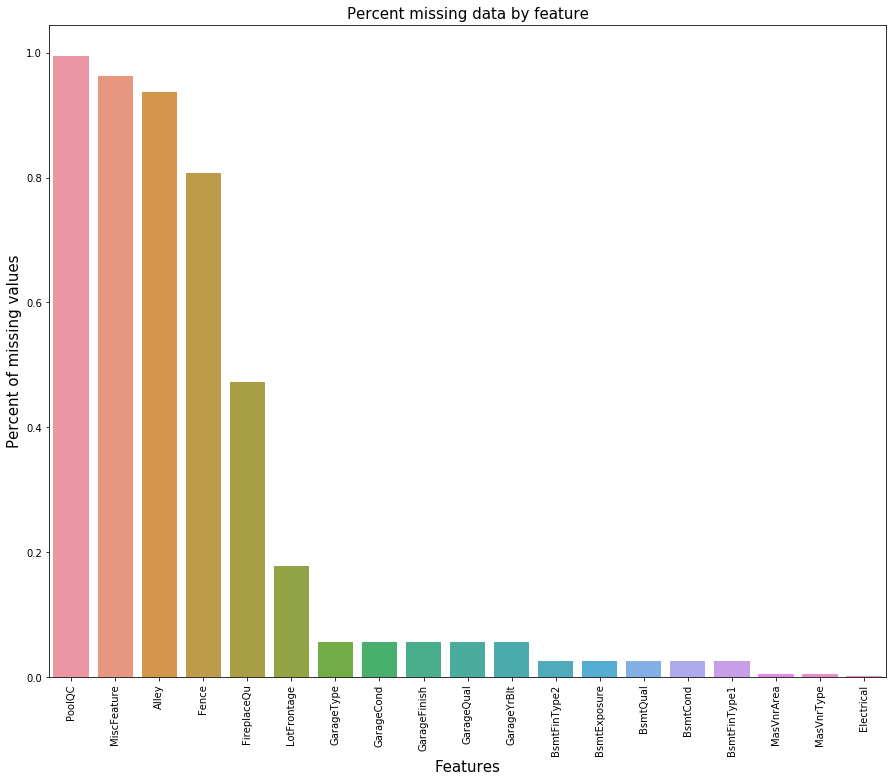

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [15]:
missing_data_summary = summary_of_missing_data(dsc_train, True)
missing_data_summary

Зробимо те саме для тестового набору даних.

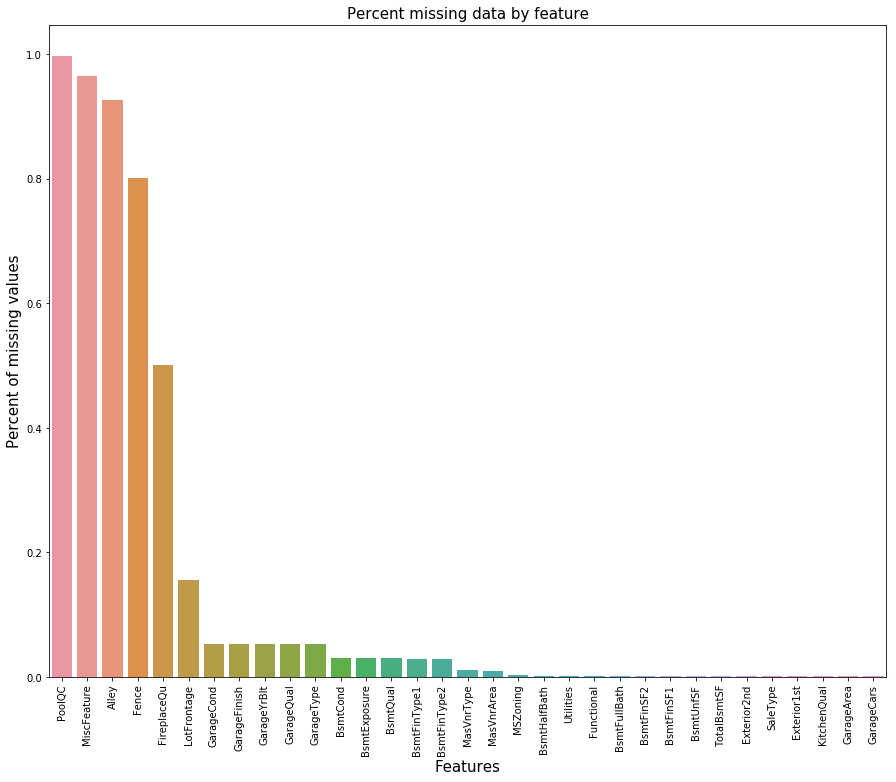

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


In [16]:
missing_data_summary = summary_of_missing_data(dsc_test, True)
missing_data_summary

Як бачите у нас є 19 ознак в тренувальному наборі даних та 33 ознаки в тестовому наборі, в яких є пропущені дані.

Оскільки кожна така ознака має різний вплив на прогностичні можливості моделі і дані можуть бути відсутні з різних причин, то ж і очищення/заміну таких даних слід робити враховуючи індивідуальні особливості кожної ознаки. 

Спершу дослідимо на скільки ознаки пливают на вартість будинку та як вони корелюють між собою.

### Кореляція характеристик

Збудуємо матрицю кореляцій між характеризуючими ознаками та цільовою ознакою 'SalePrice'

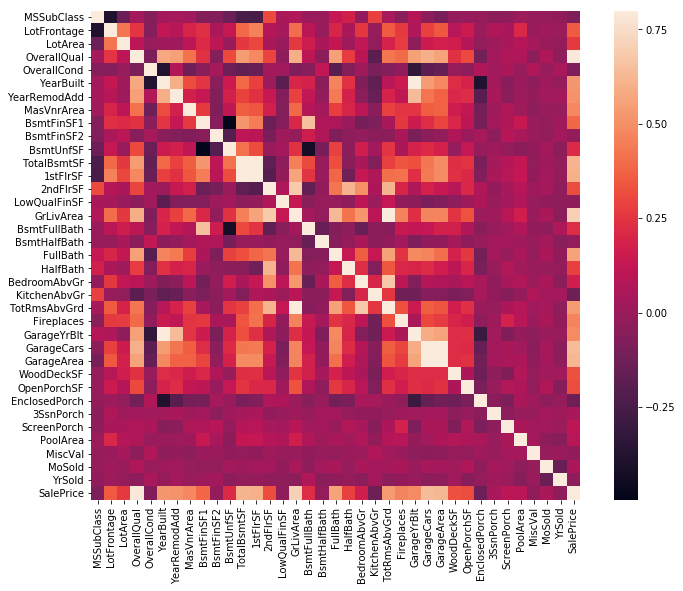

In [17]:
corrmat = dsc_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

Трохи "наблизимо" ті ознаки, які найбільше корелюють з цільомою ознакою.

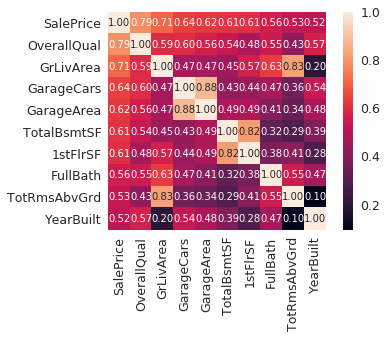

In [18]:
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dsc_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Вказати/очистити відсутні значення

#### 1. Видалемо ознаки, які сильно пов'язані між собою через і мають схожий вплив на прогностичні здібності моделі

Як видно з матриці кореляції "GarageCars" і "GarageArea" достатньо сильно корелюють між собою, що можна пояснити тим, що чим більша площа гаража ("GarageArea") - тим більше автомобілей може вмістити цей гараж ("GarageCars"). Як ми бачимо "GarageCars" трохи більше корелює з "SalePrice" - залишимо його, і позбудемось "GarageArea". Зробимо те саме і для інших подібник дублюючих ознак в тренувальному та тестовому наборі даних, наприклад "TotalBsmtSF" та "1stFloor".

In [19]:
dsc_train = drop_features(dsc_train, ["GarageArea", "1stFlrSF", "GarageYrBlt", "TotRmsAbvGrd"])
dsc_test = drop_features(dsc_test, ["GarageArea", "1stFlrSF", "GarageYrBlt", "TotRmsAbvGrd"])

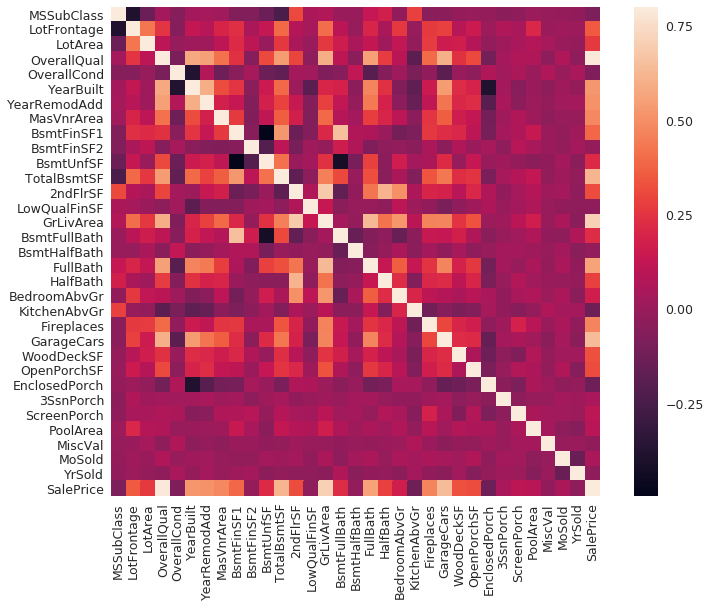

In [20]:
corrmat = dsc_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

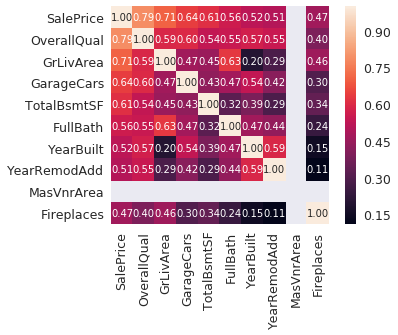

In [21]:
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dsc_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Ми позбулися деяких дублюючих ознак, але ми все ще маємо пропущені дані. Які з даних ми ще можемо видалити?

* "MiscFeature" - невідомо які ознаки, не охоплені іншими категоріями. Важко спрогнозувати як ця ознака впливає на прогнозтичні здібності моделі, оскільки в цю категорію може потрапити будь-яка ознака.
* "LotFrontage", "ExterQual" та "MasVnrArea" - оскільки ми не знаємо чому саме можуть бути відсутні данні в таких кількісних ознаках як "LotFrontage", "ExterQual" та "MasVnrArea" і чим можна їх заповнити, а також враховуючи низьку кореляцію цих ознак з "SalePrice" ми видалемо ці ознаки з датасету.

In [22]:
dsc_train = drop_features(dsc_train, ["MiscFeature", "LotFrontage", "ExterQual", "MasVnrArea"])
dsc_test = drop_features(dsc_test, ["MiscFeature", "LotFrontage", "ExterQual", "MasVnrArea"])

In [23]:
# missing_data_summary = summary_of_missing_data(dsc_train)
# missing_data_summary
missing_data_summary = summary_of_missing_data(dsc_test)
missing_data_summary

,Total,Percent
PoolQC,1456,0.997944
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
GarageQual,78,0.053461
GarageFinish,78,0.053461
GarageCond,78,0.053461
GarageType,76,0.052090
BsmtCond,45,0.030843
BsmtQual,44,0.030158


#### 2. Заповнимо пропущені ознаки

Оскільки ознаки в нашому датасеті є різного типу: кількісні та якісні, то ж і спосіб заповненя відсутніх даних в цих ознаках буде різний. Визначемо які з ознак кілкісні, а які якісні.

In [24]:
quality_features = list(dsc_train.select_dtypes(include=['object']).columns) # якісні ознаки
quantity_features = list(dsc_train.select_dtypes(include=['int64', 'float64']).columns) # кількісні ознаки

* "GarageCars" - скільки машин може вмістити в себе гараж. Це кількісна ознака. В залежності від того чому саме відсутнє це значення в тестовій виборці, його можна замінити на 0 (якщо гараж відсутній), або, наприклад, середнім значенням, якщо гараж є.
* "TotalBsmtSF" - загальна площа підвального приміщення. В залежності від того чому саме відсутнє це значення в тестовій виборці, його можна замінити на 0 (якщо площа підвального приміщення відсутня, бо відсутнє саме приміщення), або, наприклад, середнім значенням, якщо підвальне приміщення є, але не зазначене чере невідомі причини. 
* "BsmtFinSF1" - так само як і для "TotalBsmtSF".
* "BsmtHalfBath", "BsmtFullBath" - відсутні значення для цих ознак зустрічаються лише в 2 спостереженнях, я вирішив замітити їх на 0.0
* "Utilities", "MSZoning", "Functional", "Exterior1st", "Exterior2nd", "SaleType", "KitchenQual" - відсутні значення для цих якісних ознак зустрічаються лише в декількох спостереженнях, я вирішив замітити їх на фейкову категорію.

NA в таких якісних ознаках як "PoolQC", "Fence",  "Alley", "FireplaceQu", "GarageCond", "GarageType", "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1", "BsmtFinSF1", "MasVnrType" вказує на відсутність басейну, гаражу, підвалу абощо. Це може вплинути на вартість будинку. Як і якість подібних споруд, оскільки має значення чи потребують вони ремонту, чи вони перебувають у гарному стані. Для таких ознак створимо допоміжну ознаку, яка б визначала чи є в будинку басейну, гараж, підвал тощо (і тоді значення ознаки буде 1) чи ні (і тоді значення - 0).


І останнє, ми маємо одну відсутнє значення в "Electrical". Оскільки це лише одне спостереження, ми видалимо це спостереження і збережемо ознаку.

In [25]:
dsc_test[dsc_test['TotalBsmtSF'].isnull()] = 0.0
dsc_test[dsc_test['BsmtFinSF1'].isnull()] = 0.0
dsc_test[dsc_test['GarageCars'].isnull()] = 0.0
dsc_test[dsc_test['BsmtHalfBath'].isnull()] = 0.0
dsc_test[dsc_test['BsmtFullBath'].isnull()] = 0.0

dsc_test = encode_labels(dsc_test, ["Utilities", "MSZoning", "Functional", "Exterior1st", "Exterior2nd", "SaleType", "KitchenQual"])

quality_features = ["PoolQC", "Fence", "Alley", "FireplaceQu", "GarageCond", "GarageType", "GarageFinish", "GarageQual", "BsmtFinType2", "BsmtFinSF1", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType1", "MasVnrType"]
is_exist_column = ["PoolQC", "Fence", "Alley", "FireplaceQu", "GarageCond", "BsmtCond", "MasVnrType"]

columns = quality_features
dsc_train = add_new_feature_is_exist_or_not(dsc_train, is_exist_column)
dsc_train = encode_labels(dsc_train, columns)
dsc_test = add_new_feature_is_exist_or_not(dsc_test, is_exist_column)
dsc_test = encode_labels(dsc_test, columns)

dsc_train = dsc_train.drop(dsc_train.loc[dsc_train['Electrical'].isnull()].index)

In [26]:
# missing_data_summary = summary_of_missing_data(dsc_train)
# missing_data_summary
missing_data_summary = summary_of_missing_data(dsc_test)
missing_data_summary

,Total,Percent


In [29]:
NA_list=['Alley', 'Fence', 'FireplaceQu', 'GarageType','GarageCond','GarageQual','GarageFinish','BsmtFinType2',
         'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']
ds_train[NA_list]=ds_train[NA_list].fillna('na')
ds_test[NA_list]=ds_test[NA_list].fillna('na')

ind=ds_train[ds_train['Electrical'].isnull()==True].index
ds_train.loc[ind,'Electrical']=ds_train['Electrical'].value_counts().keys()[0]
ds_test.loc[ind,'Electrical']=ds_test['Electrical'].value_counts().keys()[0]

ds_train['LotFrontage']=ds_train['LotFrontage'].fillna(0)
ds_test['LotFrontage']=ds_test['LotFrontage'].fillna(0)

ind_train=ds_train[['MasVnrArea','MasVnrType','SalePrice']][ds_train['MasVnrArea'].isnull()==True].index
ds_train.loc[ind_train,'MasVnrArea']=0

ind_test=ds_test[['MasVnrArea','MasVnrType']][ds_test['MasVnrArea'].isnull()==True].index
ds_test.loc[ind_test,'MasVnrArea']=0

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'Utilities', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')

def encode_labels(dataset, cols):
    for c in cols:
        lbl = LabelEncoder() 
        lbl.fit(list(dataset[c].values)) 
        dataset[c] = lbl.transform(list(dataset[c].values))
    return dataset

ds_train = encode_labels(ds_train, cols)
ds_test = encode_labels(ds_test, cols)

In [35]:
#Checking 'NA' in train dataset
features_na=dsc_train.isnull().sum().sort_values(ascending=False)
features_na[features_na>0]

Series([], dtype: int64)

In [37]:
features_na=dsc_test.isnull().sum().sort_values(ascending=False)
features_na[features_na>0]

Series([], dtype: int64)

In [32]:
for i in ['GarageYrBlt']:
    ds_train.loc[ds_train[ds_train[i].isnull()==True].index,i]=ds_train[i].value_counts().keys()[0]
    
for i in ['GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageCars', 'GarageArea']:
    ds_test.loc[ds_test[ds_test[i].isnull()==True].index,i]=ds_test[i].value_counts().keys()[0]

In [27]:
# Видалемо колонку 'SalePrice' з тренувального набору даних, натомість створимо список 'SalePrice' для тренування 
y_train = dsc_train.xs('SalePrice', axis=1)
dsc_train = drop_features(dsc_train, ["SalePrice"])

### Prepraring data for prediction

In [28]:
#Take targate variable into y
# y_train = ds_train['SalePrice'].values
# X = ds_train.loc[:, ds_train.columns != 'SalePrice'].values
y = y_train
X = pd.get_dummies(dsc_train)

print(f"Розмірність набору даних з мітками (вартість будинку) для тренування: {y_train.shape}")

Розмірність набору даних з мітками (вартість будинку) для тренування: (1459,)


In [29]:
X.shape

(1459, 234)

### Build model and predict house prices

In [30]:
ETR = ExtraTreesRegressor(n_estimators=100, max_depth=4)
ETR.fit(X[:1000], y_train[:1000])
# ETR.fit(X, y)
print(f"Accuracy --> {ETR.score(X[1000:], y[1000:])*100}%")

Accuracy --> 80.10455366021422%


In [31]:
RFR = RandomForestRegressor(random_state=1, n_estimators=10, max_depth = 4)
RFR.fit(X[:1000], y_train[:1000])
# RFR.fit(X, y)
print(f"Accuracy --> {RFR.score(X[1000:], y[1000:])*100}%")

Accuracy --> 77.20150451155222%


In [32]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR.fit(X[:1000], y_train[:1000])
# GBR.fit(X, y)
print(f"Accuracy --> {GBR.score(X[1000:], y[1000:])*100}%")

Accuracy --> 85.20527696344143%


### Predict house prices on test dataset, send submission to kaggle.com

In [33]:
quality_features = list(dsc_train.select_dtypes(include=['object']).columns) # якісні ознаки
quantity_features = list(dsc_train.select_dtypes(include=['int64', 'float64']).columns) # кількісні ознаки
dsc_train = encode_labels(dsc_train, quality_features)
dsc_test = encode_labels(dsc_test, quality_features)
quality_features = list(dsc_test.select_dtypes(include=['object']).columns) # якісні ознаки
quantity_features = list(dsc_test.select_dtypes(include=['int64', 'float64']).columns) # кількісні ознаки

In [34]:
len(quality_features)

0

In [35]:
ETR = ExtraTreesRegressor(n_estimators=100, max_depth=4)
ETR.fit(X[:1000], y_train[:1000])
# ETR.fit(X, y)
print(f"Accuracy --> {ETR.score(X[1000:], y[1000:])*100}%")

Accuracy --> 81.09880480514717%


In [36]:
RFR = RandomForestRegressor(random_state=1, n_estimators=10, max_depth = 4)
RFR.fit(X[:1000], y_train[:1000])
# RFR.fit(X, y)
print(f"Accuracy --> {RFR.score(X[1000:], y[1000:])*100}%")

Accuracy --> 77.20150451155222%


In [37]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR.fit(X[:1000], y_train[:1000])
# GBR.fit(X, y)
print(f"Accuracy --> {GBR.score(X[1000:], y[1000:])*100}%")

Accuracy --> 86.81462307773798%


In [38]:
# X_test = pd.get_dummies(dsc_test)
# X_test.shape
# X_test = dsc_test

In [39]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)
GBR.fit(dsc_train, y_train)
y_predicted = GBR.predict(dsc_test)

In [40]:
save_submission(test_ids, y_predicted)

'submissions/submission-20190611-153650.csv'